# Proyek Analisis Data: Bike Sharing Dataset

- Nama: Ilham Rizkia N
- Email: ilhamrizkia@student.uns.ac.id
- ID Dicoding: ilhamrizkiagn

# Latar Belakang

Bike sharing system adalah versi terbaru dari rental sepeda konvensional yang mana proses dari pendaftaran member, rental hingga pengembalian semuanya
dilakukan secara otomatis. Melalui sistem ini, pengguna dapat merental dan mengembalikan sepeda dimana saja dengan mudah. Sistem ini sangat bagus
dan memiliki berbagai manfaat baik dari segi kemacetan lalu lintas, berkurangnya polusi serta menjaga kesehatan tubuh.

Proyek ini memiliki 2 dataset yang merepresentasikan jumlah rental sepeda dalam perjam dan perhari disertai beberapa kondisi seperti cuaca, waktu libur
dan lain sebagainya

# Pertanyaan Bisnis

- Pada bulan apa rental sepeda terbanyak terjadi?
- Bagaimana pengaruh rental sepeda terhadap cuaca?
- Berapa jumlah rental sepeda terhadap pengguna terdaftar dan kasual?

# Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

Proyek ini memerlukan dua tabel data yang akan dimuat pada kode berikut

#### Memuat data jumlah rental perjam

In [2]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Memuat data jumlah rental perhari

In [3]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Assessing Data

#### Menilai Data hour_df

In [4]:
hour_df.info() #untuk mencari missing value dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
hour_df.duplicated().sum() #untuk mencari jumlah duplikat

np.int64(0)

In [6]:
hour_df.describe(include='all') #untuk mencari karakteristik khusus dari suatu atribut atau kolom

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


tipe data kolom dteday masih object. akan diubah menjadi tipe data datetime. terkait duplikasi dan lainnya, tabel hour_df tidak ada masalah

#### Menilai Data day_df

In [7]:
day_df.info() #untuk mencari missing value dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.duplicated().sum() #untuk mencari nilai duplikat

np.int64(0)

In [9]:
day_df.describe(include='all') #untuk mencari karakteristik khusus dari suatu atribut atau kolom

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


tabel day_df juga hanya perlu mengganti tipe data pada kolom dteday menjadi datetime.

# Cleaning Data

kolom dteday pada tabel hour_df dan day_df akan diubah pada kode berikut ini

In [10]:
#mengubah tipe data object menjadi string
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

kolom dteday pada kedua tabel sudah berubah menjadi datetime. sekarang kita sudah bisa melakukan explorasi data

# Exploratory Data Analysis (EDA)

## 1. Pada bulan apa rental sepeda terbanyak terjadi?

untuk menjawab pertanyaan pertama. kita akan menggunakan groupby() berdasarkan kolom mnth untuk melihat jumlah rental pada tiap bulannya

In [13]:
#menghitung jumlah rental sepeda setiap bulannya
rent_month = day_df.groupby(by='mnth')[['cnt']].sum()
rent_month

,cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194
9,345991


jumlah rental paling besar terjadi pada rentang bulan mei sampai oktober, diperkirakan paling banyak rental terjadi pada musim gugur

In [14]:
#menghitung jumlah rental per musim
day_season = day_df.copy()
day_season.replace({1:'Springer',2:'Summer',3:'Fall',4:'Winter'},inplace=True)
rent_season = day_season.groupby(by='season')[['cnt']].sum()
rent_season

,cnt
season,
Fall,1061129
Springer,471348
Summer,918589
Winter,841613


## 2. Bagaimana pengaruh rental sepeda terhadap cuaca?

In [15]:
#menghitung jumlah rental per kondisi cuaca
day_weather = day_df.copy()
day_weather['weathersit'].replace({1:'Good',2:'Mist with Cloudy',3:'Varied',4:'Bad'},inplace=True)
day_weather.groupby(by='weathersit')[['cnt']].sum()

C:\Users\asus\AppData\Local\Temp\ipykernel_8804\1463540655.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_weather['weathersit'].replace({1:'Good',2:'Mist with Cloudy',3:'Varied',4:'Bad'},inplace=True)


,cnt
weathersit,
Good,2257952
Mist with Cloudy,996858
Varied,37869


cuaca sangat mempengaruhi rental sepeda. cuaca yang baik memiliki jumlah rental yang lebih banyak dari cuaca manapun. kita juga dapat melihat cuaca yang baik berada pada musim apa

In [16]:
#melihat kondisi cuaca per musim
day_weather.replace({1:'Springer',2:'Summer',3:'Fall',4:'Winter'},inplace=True)
day_weather.groupby(by='season').weathersit.value_counts()

season    weathersit      
Fall      Good                136
          Mist with Cloudy     48
          Varied                4
Springer  Good                111
          Mist with Cloudy     66
          Varied                4
Summer    Good                113
          Mist with Cloudy     68
          Varied                3
Winter    Good                103
          Mist with Cloudy     65
          Varied               10
Name: count, dtype: int64

musim gugur memiliki cuaca bagus yang lebih besar daripada musim lainnya. hal ini sejalan dengan jumlah rental sepeda paling banyak berada di musim gugur.

## 3.Berapa jumlah rental sepeda terhadap pengguna terdaftar dan kasual?

In [17]:
#buat proporsi antara pengguna casual dan pengguna terdaftar
prop_casual = day_df['casual'].sum()
prop_registered = day_df['registered'].sum()

#tiap nilai dimasukkan ke dalam DataFrame
prop = pd.DataFrame({'user':['casual','registered'],'jumlah':[prop_casual,prop_registered]})
prop

,user,jumlah
0,casual,620017
1,registered,2672662


pengguna yang terdaftar lebih banyak melakukan rental dibandingkan yang tidak mendaftar. Hal ini dapat kita gunakan sebagai strategi promosi untuk pengguna pendaftar dan tidak terdaftar.

# Visualization & Explanatory Analysis

## 1. Pada bulan apa rental sepeda terbanyak terjadi?

Kita akan menggunakan bar chart untuk mengetahui jumlah rental terbanyak pada tiap bulannya dan tiap musimnya. Chart ini akan mengambil nilai **mnth** dan **season** sebagai sumbu-x dan nilai **cnt** sebagai sumbu-y

C:\Users\asus\AppData\Local\Temp\ipykernel_8804\3927753116.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="mnth", y="cnt", data=rent_month, ax=ax[0],palette=["#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
C:\Users\asus\AppData\Local\Temp\ipykernel_8804\3927753116.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=rent_season.sort_values(by='cnt',ascending=False),ax=ax[1],palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"])


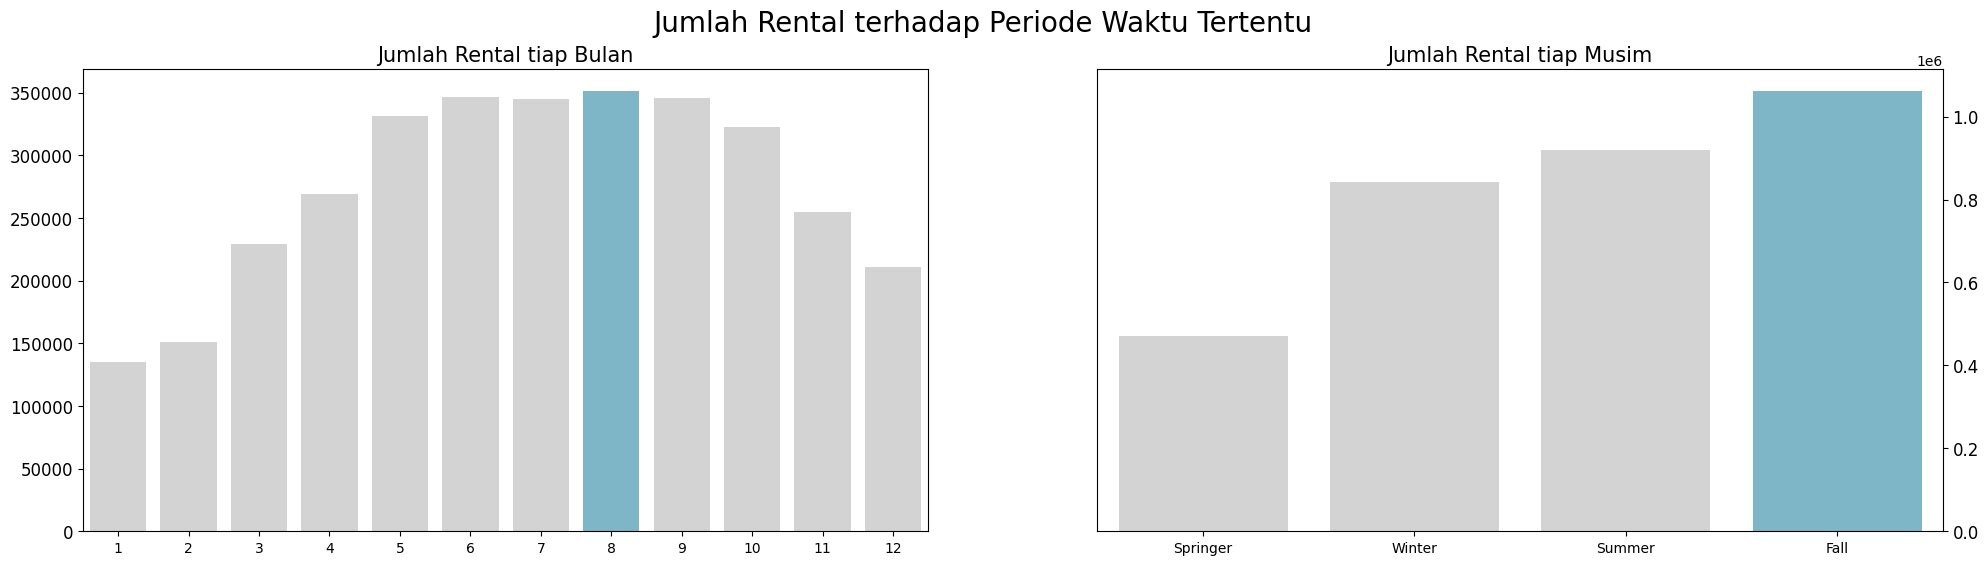

In [18]:
#mengatur ukuran chart dan jumlah kolom chart
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

#membuat barchart perbulan di sebelah kiri
sns.barplot(x="mnth", y="cnt", data=rent_month, ax=ax[0],palette=["#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Jumlah Rental tiap Bulan", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

#membuat barchart permusim di sebelah kanan
sns.barplot(x="season", y="cnt", data=rent_season.sort_values(by='cnt',ascending=False),ax=ax[1],palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Jumlah Rental tiap Musim", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Jumlah Rental terhadap Periode Waktu Tertentu", fontsize=20)
plt.show()

seperti yang terlihat, rental sepeda terbanyak terjadi pada rentang bulan mei hingga oktober dan puncaknya ada di bulan Agustus. Rentang bulan tersebut berada pda musim gugur

## 2. Bagaimana pengaruh rental sepeda terhadap cuaca?

Kita juga akan menggunakan barchart untuk melihat jumlah rental terbanyak yang didapat pada kondisi cuaca tertentu.

C:\Users\asus\AppData\Local\Temp\ipykernel_8804\3658959544.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=day_weather,palette=["#D3D3D3", "#72BCD4", "#D3D3D3"],errorbar=None)


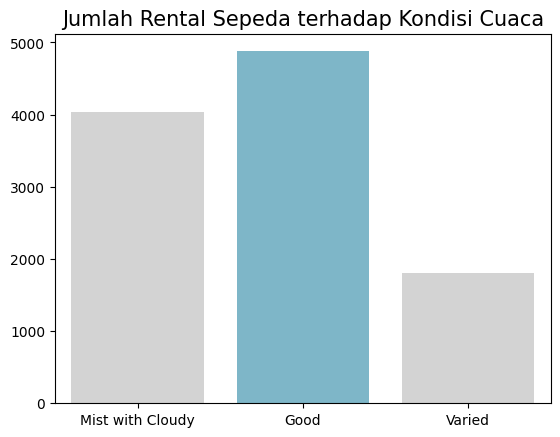

In [19]:
#mengatur ukuran chart
figsize = (15,10)

#membuat barchart jumlah rental terhadap kondisi cuaca
sns.barplot(x="weathersit", y="cnt", data=day_weather,palette=["#D3D3D3", "#72BCD4", "#D3D3D3"],errorbar=None)
plt.ylabel(None)
plt.xlabel(None)
plt.title("Jumlah Rental Sepeda terhadap Kondisi Cuaca", fontsize=15)

plt.show()

Cuaca sangat mempengaruhi jumlah sepeda yang dirental. terlihat bahwa cuaca yang baik (tanpa hujan atau badai) membuat pengguna lebih banyak memilih rental sepeda.

## 3.Berapa jumlah rental sepeda terhadap pengguna terdaftar dan kasual?

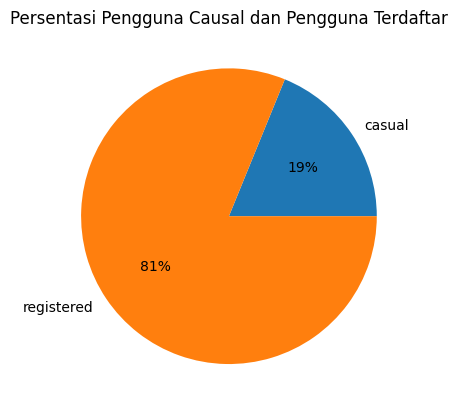

In [20]:
# membuat pie chart terhadap proporsi pengguna casual dan terdaftar
plt.pie(data=prop,x='jumlah',labels='user',autopct='%.0f%%')
plt.title('Persentasi Pengguna Causal dan Pengguna Terdaftar')

# menampilkan chart
plt.show()

Berdasarkan chart di atas terlihat bahwa pengguna jumlah rental lebih banyak dilakukan oleh pengguna terdaftar sebanyak 81% dibandingkan dengan pengguna casual yang hanya 19%

# Conclusion

- Conclution pertanyaan 12

Pengguna cenderung rental sepeda pada musim gugur. Hal ini dikarenakan cuaca yang  tidak tidak terlalu dingin. Pihak pengembang Bike Rental System dapat memanfaatkan kondisi ini dengan memberikan pelayanan optimal di musim gugur serta memberikan berbagai promo menarik untuk menarik lebih banyak pengguna.

- Conclution pertanyaan 2

Kondisi cuaca sangat memengaruhi pengguna untuk rental sepeda. Rental terbanyak terjadi di cuaca baik dan tidak yang rental sepeda sama sekali pada kondisi badai. Pihak pengembang perlu memperhatikan kondisi cuaca sebelum melakukan promosi atau campaign besar-besaran. Akan lebih baik bila sistem aplikasi rental disediakan fitur prediksi cuaca agar dapat lebih meyakinkan pengguna melakukan rental.

- Conclution pertanyaan 3